#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [96]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Python(85010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
17551.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [97]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

Python(85013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
17559.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Python(85015) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
17564.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/usr/local/bin:/Users/regina/Library/Python/3.13/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin


In [98]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [99]:

!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

Python(85019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
17570.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


mkdir: LHCb_Data: File exists


In [100]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [101]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [102]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

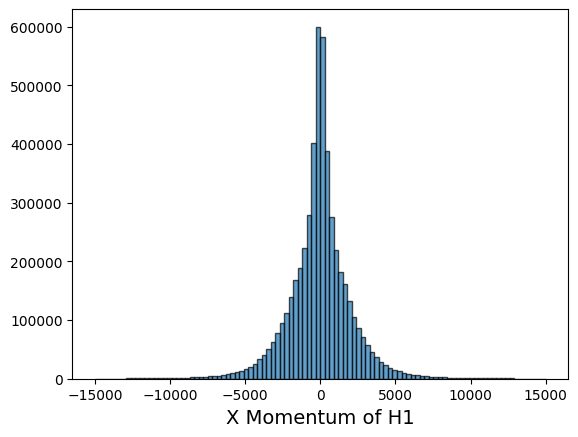

In [103]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000), alpha=0.7, edgecolor="black");
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

Total Momentum: [5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.21e+03]


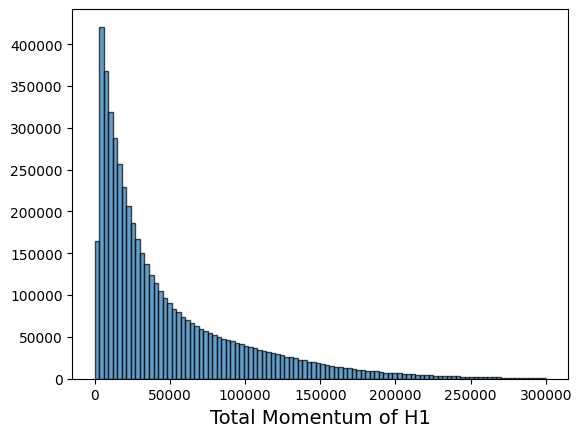

In [104]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()
# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)

print("Total Momentum:",H1_Ptot)

# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,300000), alpha=0.7, edgecolor="black");
plt.xlabel('Total Momentum of H1', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

Total Momentum of Mother Particle (B Meson): [1.75e+05, 4.19e+05, 1.94e+05, 1.22e+05, ..., 5.41e+04, 1.58e+05, 1.42e+05]


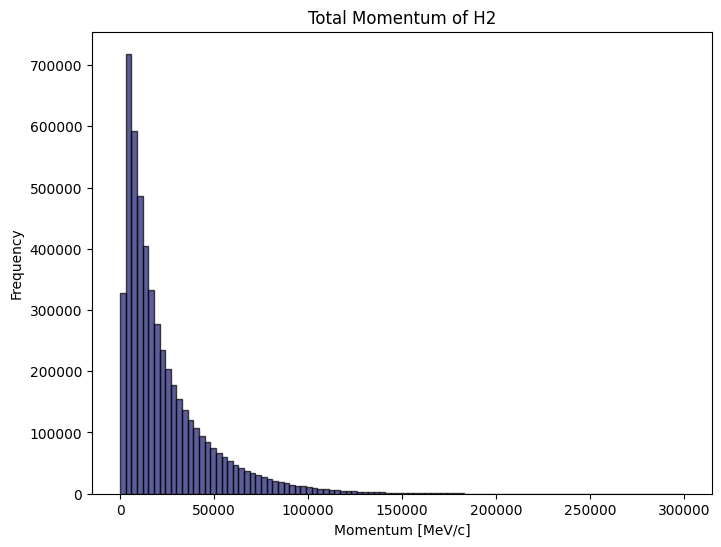

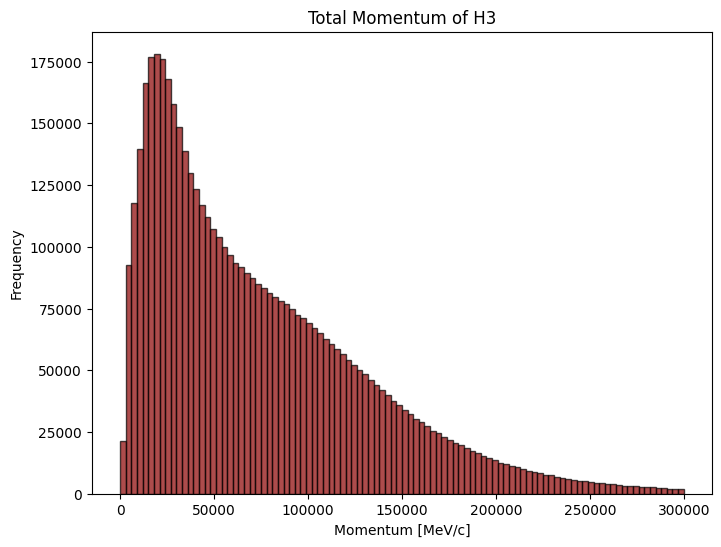

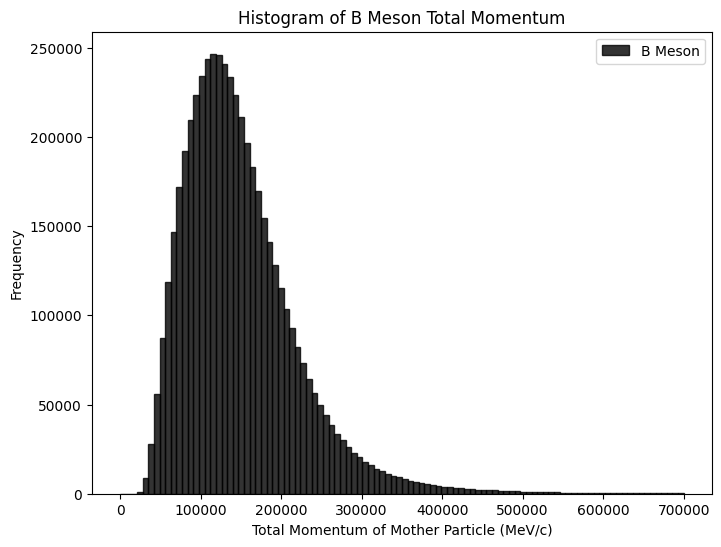

In [105]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...
'''Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()

H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()



H1_Ptot=np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
H2_Ptot=np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
H3_Ptot=np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)

#B_Ptot=H1_Ptot + H2_Ptot + H3_Ptot

#M_Ptot=np.linalg.norm(B_Ptot)

M_Ptot=H1_Ptot + H2_Ptot + H3_Ptot

# Print results
#print("Momentum components of Mother Particle:", B_Ptot)
print("Total Momentum of Mother Particle:", M_Ptot)

plt.figure(figsize=(8, 6))
plt.hist(M_Ptot, bins=100, range=(0,300000))

# Labels and title
plt.xlabel("Total momentum of Mother Particle")
plt.ylabel("Frequency")
plt.title("Histogram of Momentum Components")
plt.legend()

# Show plot
plt.show()'''


# I started by loading event data from DecayTree
Events = f['DecayTree']

# I got the momentum components for all three daughter particles
H1_PX, H1_PY, H1_PZ = Events['H1_PX'].array(), Events['H1_PY'].array(), Events['H1_PZ'].array()
H2_PX, H2_PY, H2_PZ = Events['H2_PX'].array(), Events['H2_PY'].array(), Events['H2_PZ'].array()
H3_PX, H3_PY, H3_PZ = Events['H3_PX'].array(), Events['H3_PY'].array(), Events['H3_PZ'].array()

# I computed total momentum for each daughter particle
H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)

# In here I computed the total momentum of the B meson using vector sum
B_PX, B_PY, B_PZ = H1_PX + H2_PX + H3_PX, H1_PY + H2_PY + H3_PY, H1_PZ + H2_PZ + H3_PZ
M_Ptot = np.sqrt(B_PX**2 + B_PY**2 + B_PZ**2)

print("Total Momentum of Mother Particle (B Meson):", M_Ptot)

# I plotted histograms for individual daughter momenta
plt.figure(figsize=(8, 6))
plt.hist(H2_Ptot, bins=100, range=(0, 300000), color='midnightblue', alpha=0.7, edgecolor="black")
plt.xlabel("Momentum [MeV/c]")
plt.ylabel("Frequency")
plt.title("Total Momentum of H2")
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(H3_Ptot, bins=100, range=(0, 300000), color='darkred', alpha=0.7, edgecolor="black")
plt.xlabel("Momentum [MeV/c]")
plt.ylabel("Frequency")
plt.title("Total Momentum of H3")
plt.show()

# I PLOTTED A histogram for the mother particle's total momentum
plt.figure(figsize=(8, 6))
plt.hist(M_Ptot, bins=100, range=(0, 700000), color='black', alpha=0.8, edgecolor="black", label="B Meson")
plt.xlabel("Total Momentum of Mother Particle (MeV/c)")
plt.ylabel("Frequency")
plt.title("Histogram of B Meson Total Momentum")
plt.legend()
plt.show()



In [106]:
'''My comments

For this part of the task I initially plotted only the total momentum of the Mother 
Particle and was planning on plotting the total momentum of H2 and H3 in the code cell 
but I ended up doing it here. I kept the original code at the top of the cell because I used 
it for reference to writte the new one.
As you can see, I also modified the range from (0,300k) to (0,700k) in order to visualize better
the whole distribution of the data.'''

'My comments\n\nFor this part of the task I initially plotted only the total momentum of the Mother \nParticle and was planning on plotting the total momentum of H2 and H3 in the code cell \nbut I ended up doing it here. I kept the original code at the top of the cell because I used \nit for reference to writte the new one.\nAs you can see, I also modified the range from (0,300k) to (0,700k) in order to visualize better\nthe whole distribution of the data.'

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [107]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print (f"{branch}: {value}")

Event number #45
-------------------
B_FlightDistance: 257.00205776946603
B_VertexChi2: 1.865567179221614
H1_PX: 420.3413896413646
H1_PY: -110.66276079201207
H1_PZ: 5883.766388082404
H1_ProbK: 0.012183159589767456
H1_ProbPi: 0.8191394209861755
H1_Charge: -1
H1_IPChi2: 27121.53690741779
H1_isMuon: 1
H2_PX: -985.6367588987478
H2_PY: 630.9893539299605
H2_PZ: 35342.13861801284
H2_ProbK: 0.6670113801956177
H2_ProbPi: 0.04563945531845093
H2_Charge: 1
H2_IPChi2: 13712.438218214942
H2_isMuon: 0
H3_PX: -6242.300384410311
H3_PY: -862.2130979651508
H3_PZ: 277275.49225626234
H3_ProbK: 0.07501816749572754
H3_ProbPi: 0.428352952003479
H3_Charge: 1
H3_IPChi2: 1026.12298434195
H3_isMuon: 0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

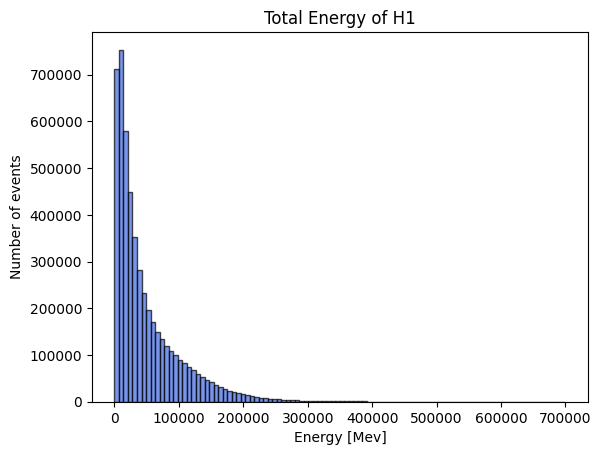

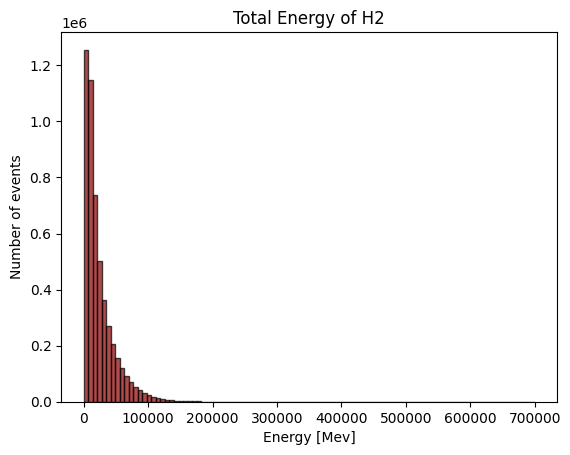

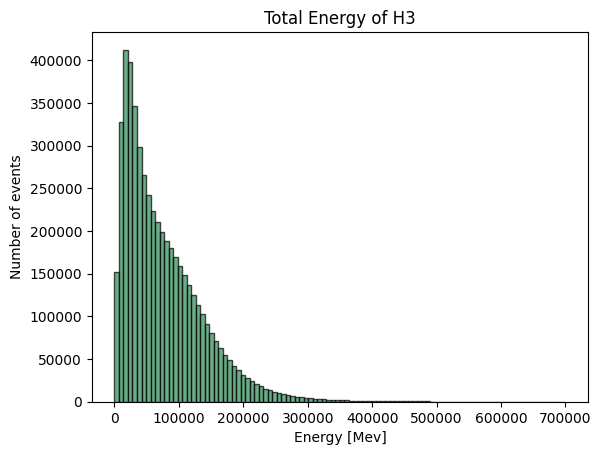

In [108]:
# This is the mass of the Kaon in MeV/c^2 retrieved from Google
mass_kaon = 493.677  # MeV/c^2

# In here, I definied a function to calculate energy using the relativistic equation E² = p² + m²
def compute_energy(momentum, mass):
    return np.sqrt(momentum**2 + mass**2)

# Here I computed the total energy for each Kaon
E_H1 = compute_energy(H1_Ptot, mass_kaon)
E_H2 = compute_energy(H2_Ptot, mass_kaon)
E_H3 = compute_energy(H3_Ptot, mass_kaon)

#This is to plot the histograms of all the energies
plt.figure();
plt.hist (E_H1, bins=100, range=(0,700000), color='royalblue', alpha=0.7, edgecolor="black");
plt.xlabel('Energy [Mev]');
plt.ylabel('Number of events');
plt.title('Total Energy of H1');
plt.figure();
plt.hist (E_H2, bins=100, range=(0,700000), color='darkred', alpha=0.7, edgecolor="black");
plt.xlabel('Energy [Mev]');
plt.ylabel('Number of events');
plt.title('Total Energy of H2');
plt.figure();
plt.hist (E_H3, bins=100, range=(0,700000), color='seagreen', alpha=0.7, edgecolor="black");
plt.xlabel('Energy [Mev]');
plt.ylabel('Number of events');
plt.title('Total Energy of H3');

In [109]:
'''My comments
In this section, we are calculatin the energy of each of the daughter particles,
which we are assuming, are all Kaons. Using the provided relativistic equation, 
I calculated the ebery for the daughter particles and plotted a histogram 
showing the energy of each.'''

'My comments\nIn this section, we are calculatin the energy of each of the daughter particles,\nwhich we are assuming, are all Kaons. Using the provided relativistic equation, \nI calculated the ebery for the daughter particles and plotted a histogram \nshowing the energy of each.'

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

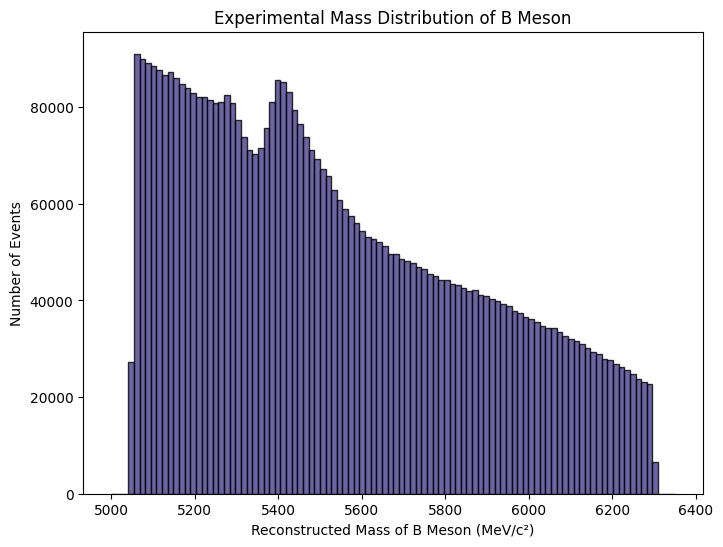

In [110]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#Hint - look it up

# I sumed the energies of the three kaons to find the total energy of the B meson.
B_total_energy = E_H1 + E_H2 + E_H3  

# I used the equation: m^2 = E^2 - p^2 to calculate the mass
B_mass = np.sqrt(B_total_energy**2 - (M_Ptot)**2) 

#I now plotted a histogram of the range of masses of the B meson.
plt.figure(figsize=(8, 6))
plt.hist(B_mass, bins=100, range=(5000, 6350), color='darkslateblue', alpha=0.8, edgecolor='black')
plt.xlabel("Reconstructed Mass of B Meson (MeV/c²)")
plt.ylabel("Number of Events")
plt.title("Experimental Mass Distribution of B Meson")
plt.show()



In [111]:
'''My comments 
In here, I combined the energy of all the daughter particles in order to obtain
the experimental mass of the mother. The mass distribution should peak around 
the known mass of the B meson 5279 MeV/c². However in the graph we can observe 
two peaks which can rather be attributed to background events which were wrongly
classified and introduced noise.
'''

'My comments \nIn here, I combined the energy of all the daughter particles in order to obtain\nthe experimental mass of the mother. The mass distribution should peak around \nthe known mass of the B meson 5279 MeV/c². However in the graph we can observe \ntwo peaks which can rather be attributed to background events which were wrongly\nclassified and introduced noise.\n'

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

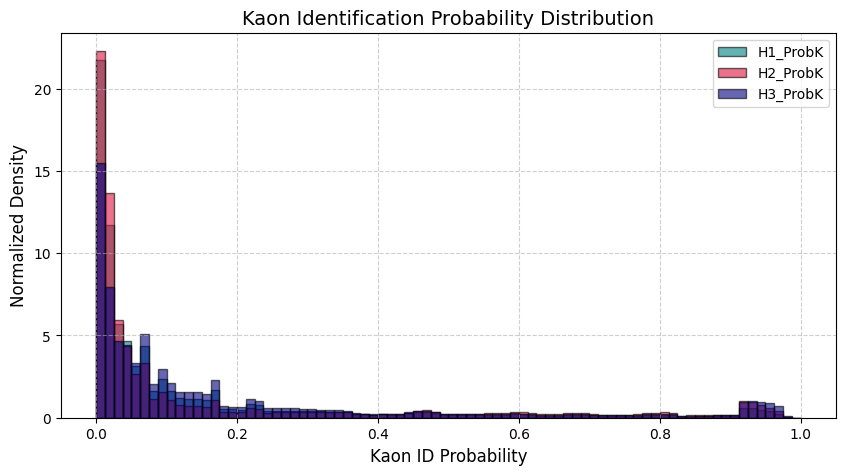

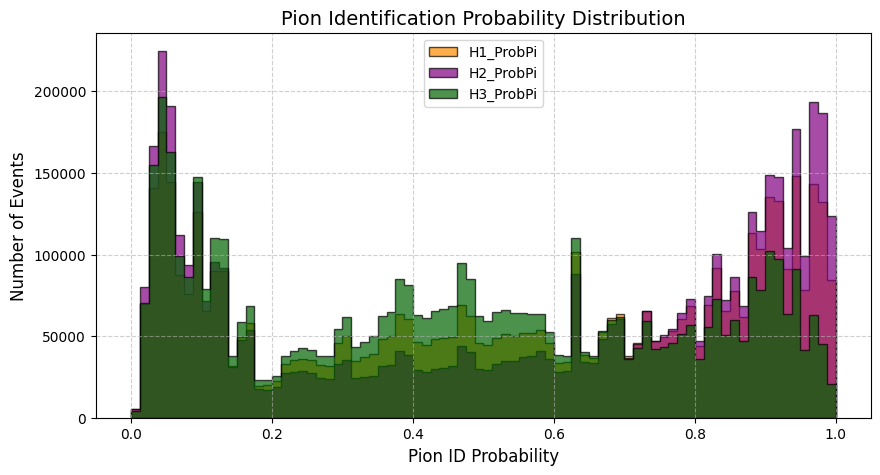

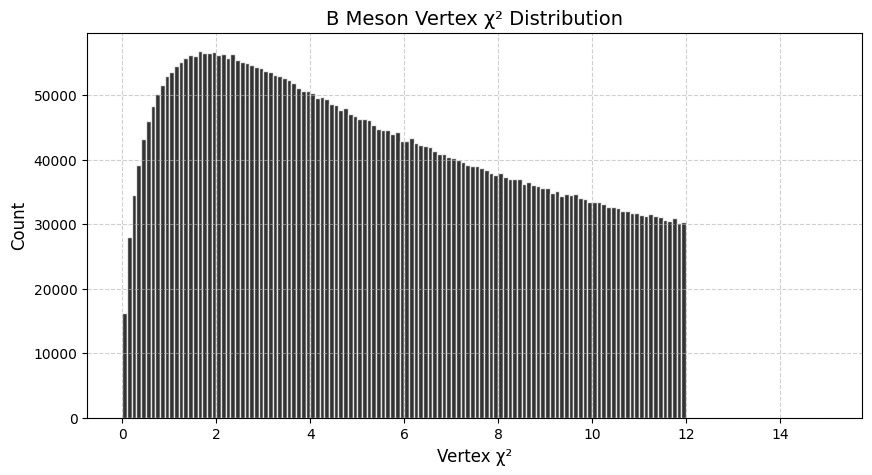

/Users/regina/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


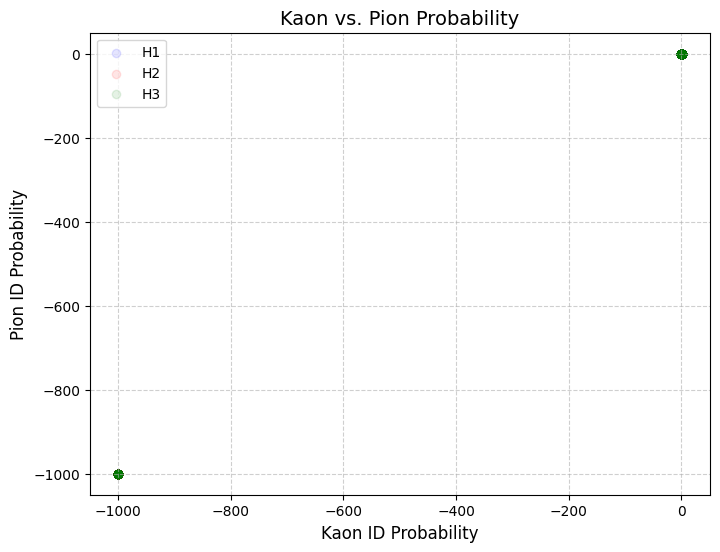

In [ ]:
#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2
# Plot any other variables from the list above you think would be handy to use in a selection...

# I got the stored probabilities for each hadron being identified as a Kaon or a Pion.
H1_ProbK = Events['H1_ProbK'].array()
H2_ProbK = Events['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array()
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()


# I used a density plot to see how the probability is distributed.
plt.figure(figsize=(10, 5))
plt.hist(H1_ProbK, bins=80, range=(0, 1), color='teal', alpha=0.6, edgecolor='black', density=True, label='H1_ProbK')
plt.hist(H2_ProbK, bins=80, range=(0, 1), color='crimson', alpha=0.6, edgecolor='black', density=True, label='H2_ProbK')
plt.hist(H3_ProbK, bins=80, range=(0, 1), color='navy', alpha=0.6, edgecolor='black', density=True, label='H3_ProbK')
plt.xlabel("Kaon ID Probability", fontsize=12)
plt.ylabel("Normalized Density", fontsize=12)
plt.title("Kaon Identification Probability Distribution", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# I used the histogram to show distributions.
plt.figure(figsize=(10, 5))
plt.hist(H1_ProbPi, bins=80, range=(0, 1), histtype="stepfilled", color='darkorange', alpha=0.7, edgecolor='black', label='H1_ProbPi')
plt.hist(H2_ProbPi, bins=80, range=(0, 1), histtype="stepfilled", color='purple', alpha=0.7, edgecolor='black', label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=80, range=(0, 1), histtype="stepfilled", color='darkgreen', alpha=0.7, edgecolor='black', label='H3_ProbPi')
plt.xlabel("Pion ID Probability", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.title("Pion Identification Probability Distribution", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# This variable helped to see which are the well-reconstructed events which ones are the poorly reconstructed ones.
B_VertexChi2 = Events['B_VertexChi2'].array()
plt.figure(figsize=(10, 5))
plt.hist(B_VertexChi2, bins=150, range=(0, 15), color='black', alpha=0.8, edgecolor='white')
plt.xlabel("Vertex χ²", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("B Meson Vertex χ² Distribution", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# I created a scatter plot to check how Kaon and Pion probabilities correlate.
plt.figure(figsize=(8, 6))
plt.scatter(H1_ProbK, H1_ProbPi, alpha=0.1, color='blue', label="H1")
plt.scatter(H2_ProbK, H2_ProbPi, alpha=0.1, color='red', label="H2")
plt.scatter(H3_ProbK, H3_ProbPi, alpha=0.1, color='green', label="H3")
plt.xlabel("Kaon ID Probability", fontsize=12)
plt.ylabel("Pion ID Probability", fontsize=12)
plt.title("Kaon vs. Pion Probability", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [113]:
'''My comments 
In this section I looked at the probability of each track to be identified
as a Kaon or Pion

In the third graph I plotted the χ² value measures how well the B mesons 
decay vertex fits a true particle interaction. A lower χ² value means a better 
fit, indicating that the decay vertex is well reconstructed. Because there is a 
peak at low χ² values (close to 0), we can say most events are well-reconstructed.


This scatter plot compares how often particles are classified as both a Kaon 
and a Pion. Because we can see a clear separation we can say the detector 
is doing a good job distinguishing Kaons from Pions. Other wise, if many points have 
both high ProbK and ProbPi, it suggests confusion in the particle identification process.
'''

'My comments \nIn this section I looked at the probability of each track to be identified\nas a Kaon or Pion\n\nIn the third graph I plotted the χ² value measures how well the B mesons \ndecay vertex fits a true particle interaction. A lower χ² value means a better \nfit, indicating that the decay vertex is well reconstructed. Because there is a \npeak at low χ² values (close to 0), we can say most events are well-reconstructed.\n\n\nThis scatter plot compares how often particles are classified as both a Kaon \nand a Pion. Because we can see a clear separation we can say the detector \nis doing a good job distinguishing Kaons from Pions. Other wise, if many points have \nboth high ProbK and ProbPi, it suggests confusion in the particle identification process.\n'

Using these plots, we can now think about making a preselection. This has some format like the below:

In [114]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)

# I setted the parameters for Kaon probability to ensure the daughters are likely Kaons
kaon_selection = (
    (branches['H1_ProbK'] > 0.4) &  
    (branches['H2_ProbK'] > 0.4) &  
    (branches['H3_ProbK'] > 0.4)  
)

# I ensured that none of the selected particles are muons to take away contamination
muon_veto = (
    (branches['H1_isMuon'] == 0) &  
    (branches['H2_isMuon'] == 0) &  
    (branches['H3_isMuon'] == 0)  
)

# I created this pion rejection step to further improve the selection
# This is because since Kaons and Pions can be confused, I make sure that our Kaon candidates have also a low Pion probability
pion_rejection = (
    (branches['H1_ProbPi'] < 0.2) &  
    (branches['H2_ProbPi'] < 0.2) &  
    (branches['H3_ProbPi'] < 0.2)  
)

# I did vertex quality cuts based on the B_VertexChi2 variable
vertex_quality = (branches['B_VertexChi2'] < 15)

# I include a flight distance cut to keep excluding background noise
flight_distance = (branches['B_FlightDistance'] < 30)

# I combined all preselection criteria into a single selection filter and applied the selection filter 
selection = kaon_selection & muon_veto & pion_rejection & vertex_quality & flight_distance
filtered_data = branches[selection]

print(f"Total events before selection: {len(branches)}")
print(f"Total events after selection: {len(filtered_data)}")



Total events before selection: 5135823
Total events after selection: 11676


In [115]:
'''mY Comments 
To improve the data selection, I made several small conditions to get the most accureate 
selection of events. I also decided to do it in small sections for it to be easier to modify
as I was writting the code 
I especailly focus on Pions not being filtered in the selected data with the Pion rejection step. 

I got the inspiration for this step from the data selection process we did during my last project 
period during January 2025 "Searching for matter-antimatter differences in beauty decays 
using LHCb data", where we also needed to filter data to work with Kaons.
'''

'mY Comments \nTo improve the data selection, I made several small conditions to get the most accureate \nselection of events. I also decided to do it in small sections for it to be easier to modify\nas I was writting the code \nI especailly focus on Pions not being filtered in the selected data with the Pion rejection step. \n\nI got the inspiration for this step from the data selection process we did during my last project \nperiod during January 2025 "Searching for matter-antimatter differences in beauty decays \nusing LHCb data", where we also needed to filter data to work with Kaons.\n'

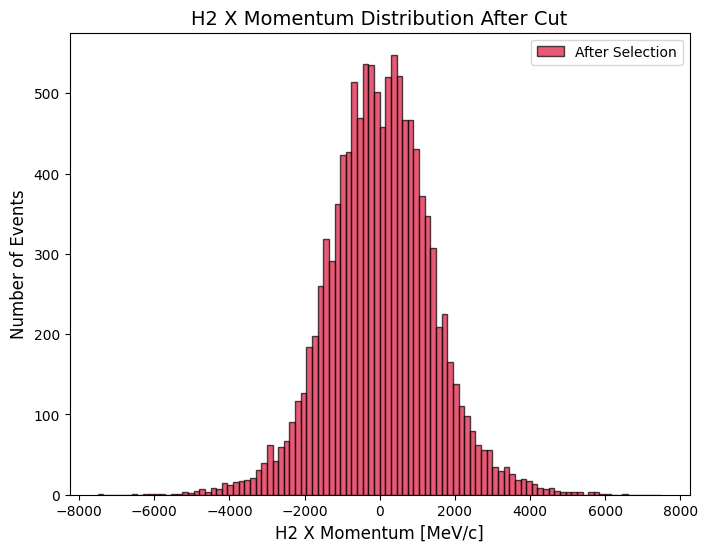

Total number of selected events: 11676 / 5135823


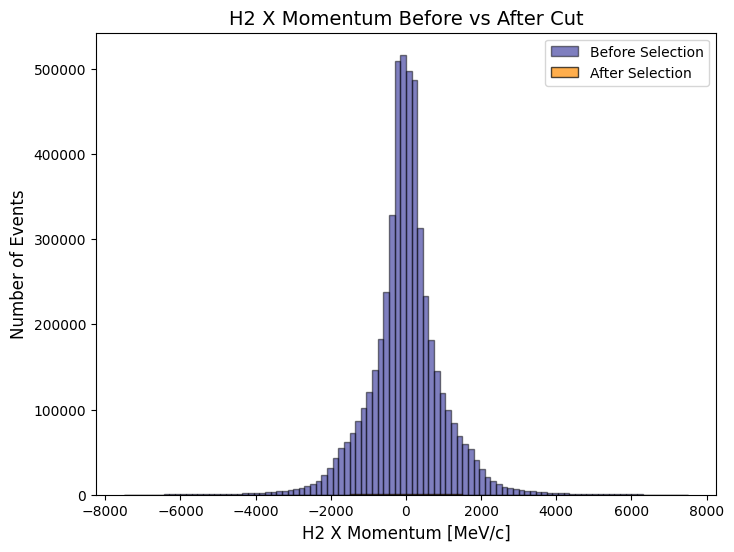

Total events before selection: 5135823
Total events after selection: 11676


In [116]:
#To apply the selection - we can use the selection command after our instruction e.g.:
#CutTree=branches['H2_PX'][selection]
#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
#Try plotting our H2_PX distribution with and without the selection and spot the differences...


# I used the previously defined selection criteria to create a refined dataset (CutTree)
CutTree = branches[selection]

# I got H2_PX before applying the cuts to compare later
H2_PX_before = f["DecayTree/H2_PX"].array()
H2_PX_after = CutTree["H2_PX"]

# I plotted the H2_PX distribution after selection
plt.figure(figsize=(8, 6))
plt.hist(H2_PX_after, bins=100, range=(-7500, 7500), color='crimson', alpha=0.7, edgecolor="black", label="After Selection")
plt.xlabel("H2 X Momentum [MeV/c]", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.title("H2 X Momentum Distribution After Cut", fontsize=14)
plt.legend()
plt.show()

print(f"Total number of selected events: {len(CutTree)} / {len(branches)}")

# I the overlayed the histograms to do a before and after comparison
# Instead of separate plots, I overlay both histograms for a direct comparison.

plt.figure(figsize=(8, 6))
plt.hist(H2_PX_before, bins=100, range=(-7500, 7500), color='navy', alpha=0.5, edgecolor="black", label="Before Selection")
plt.hist(H2_PX_after, bins=100, range=(-7500, 7500), color='darkorange', alpha=0.7, edgecolor="black", label="After Selection")
plt.xlabel("H2 X Momentum [MeV/c]", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.title("H2 X Momentum Before vs After Cut", fontsize=14)
plt.legend()
plt.show()

print(f"Total events before selection: {len(H2_PX_before)}")
print(f"Total events after selection: {len(H2_PX_after)}")


In [117]:
'''My comments 
I firts did a histogram of the H2 X Momentum distribution after the cut was made with the 
parameters previously applied in the data selection cell code.
Then I made a histrogram comparing the momentum before and after. However, as you can see 
below the sencon histogram, the events after the selection are a lot less than before and
hence, cannot be visualized in the historgram.
'''

'My comments \nI firts did a histogram of the H2 X Momentum distribution after the cut was made with the \nparameters previously applied in the data selection cell code.\nThen I made a histrogram comparing the momentum before and after. However, as you can see \nbelow the sencon histogram, the events after the selection are a lot less than before and\nhence, cannot be visualized in the historgram.\n'

Total B meson candidates before selection: 5135823
Total B meson candidates after selection: 11676


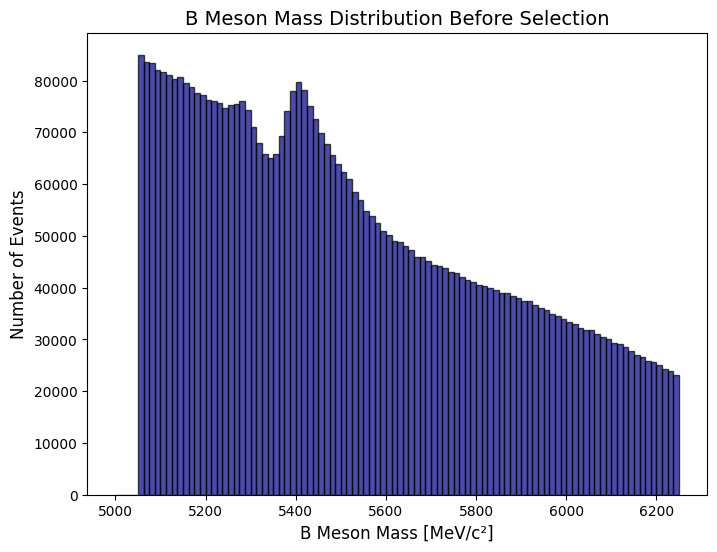

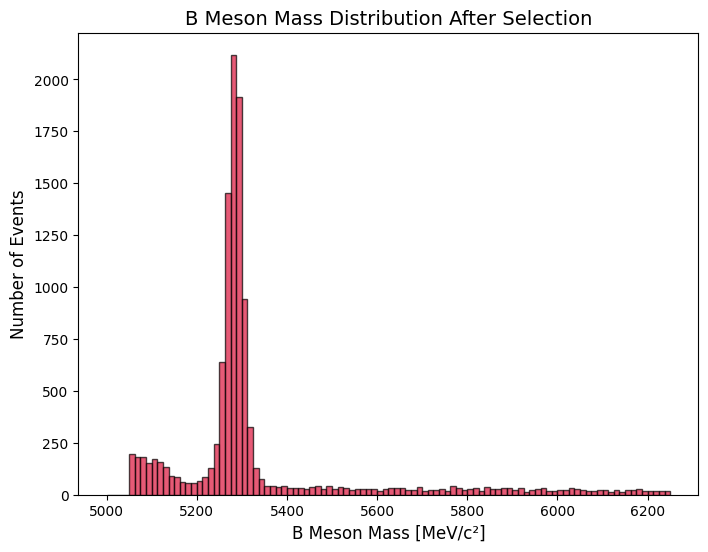

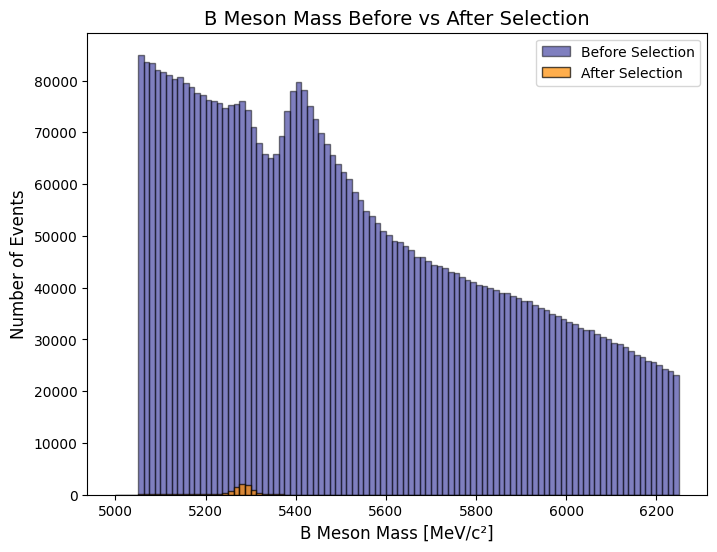

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

# I used the same selection of information I applied earlier to extract only selected B meson guesses.
B_mass_before = B_mass  
B_mass_after = B_mass_before[selection]

# iN HERE I am checking how many events remain after the selection
num_before = len(B_mass_before)
num_after = len(B_mass_after)
print(f"Total B meson candidates before selection: {num_before}")
print(f"Total B meson candidates after selection: {num_after}")

# This is the plot of the B meson mass distribution before selection
plt.figure(figsize=(8, 6))
plt.hist(B_mass_before, bins=100, range=(5000, 6250), color='navy', alpha=0.7, edgecolor='black')
plt.xlabel("B Meson Mass [MeV/c²]", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.title("B Meson Mass Distribution Before Selection", fontsize=14)
plt.show()

# this is the plot of the B meson mass distribution after selection
plt.figure(figsize=(8, 6))
plt.hist(B_mass_after, bins=100, range=(5000, 6250), color='crimson', alpha=0.7, edgecolor='black')
plt.xlabel("B Meson Mass [MeV/c²]", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.title("B Meson Mass Distribution After Selection", fontsize=14)
plt.show()

# I the combined both histograms with different colors to show the effect of the selection.
plt.figure(figsize=(8, 6))
plt.hist(B_mass_before, bins=100, range=(5000, 6250), color='navy', alpha=0.5, edgecolor='black', label="Before Selection")
plt.hist(B_mass_after, bins=100, range=(5000, 6250), color='darkorange', alpha=0.7, edgecolor='black', label="After Selection")
plt.xlabel("B Meson Mass [MeV/c²]", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.title("B Meson Mass Before vs After Selection", fontsize=14)
plt.legend()
plt.show()

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [119]:
CutTreeBm = B_mass[selection]  # Apply selection to B meson mas

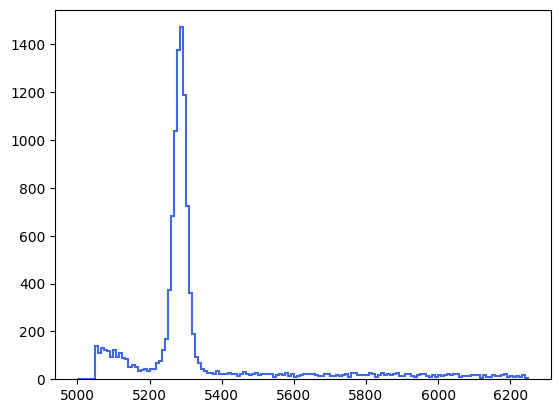

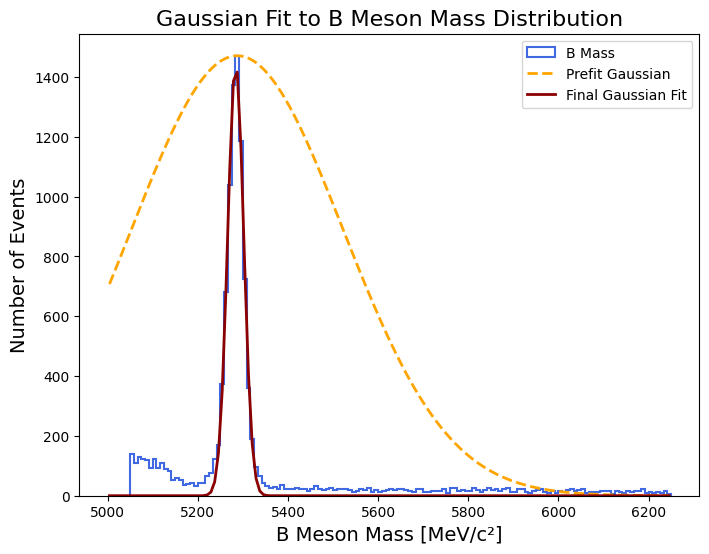

In [120]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
#B_Mass = branches['B_mass']

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
#bin_height, bin_edge, _=plt.hist(B_Mass, bins=200, range(min, max), label = "B Mass")

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
#x_data =
#y_data =

#Create a Gauss function for fitting - nothing needs changing here
#def gauss (x, *p):
    #A, mu, sigma = p
    #return A*np.exp(-(x-mu)**2/2.*sigma**2))

# Get the fitted curve - some things need changing here
#optimisedParameters, pcov = curve_fit(gauss, xdata, ydata, p0=[1, 2, 3]);
#note you need to pick some initial parameters in p0= above!

#yfit = gauss(xdata, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well

#plt.plot(x_data, y_fit, label='fit');
#ax.set_xlabel("Units here", fontsize=15)
#ax.set_ylabel("Units here", fontsize=15)

#ax.legend()
#plt.legend()
#plt.show()


# I extracted the B meson mass data after selection
B_mass_selected = CutTreeBm  # B meson mass after cuts

# I crreated a histogram and extract bin data for the fitting
bin_heights, bin_edges, _ = plt.hist(B_mass_selected, bins=150, range=(5000, 6250), label="B Mass (Selected)", color='royalblue', histtype='step', linewidth=1.5)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute the center of each bin

# I then defined a Gaussian function for fitting
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


#I then did the Gaussian fit using prefit values as an initial guess
initial_guess = [prefit_A, prefit_mu, prefit_sigma]
optimized_params, covariance_matrix = curve_fit(gaussian, bin_centers, bin_heights, p0=initial_guess)

#I got the fit parameters
A_fit, mu_fit, sigma_fit = optimized_params
uncertainties = np.sqrt(np.diag(covariance_matrix))  # Extract uncertainties for the parameters

#I created the fitted Gaussian curve
y_fit = gaussian(bin_centers, *optimized_params)

# I plotted the histogram and both Gaussian curves with the prefit and final fit
plt.figure(figsize=(8, 6))
plt.hist(B_mass_selected, bins=150, range=(5000, 6250), label="B Mass", color='royalblue', histtype='step', linewidth=1.5)
plt.plot(bin_centers, y_prefit, '--', label=f'Prefit Gaussian', color='orange', linewidth=2)
plt.plot(bin_centers, y_fit, label=f'Final Gaussian Fit', color='darkred', linewidth=2)
plt.xlabel("B Meson Mass [MeV/c²]", fontsize=14)
plt.ylabel("Number of Events", fontsize=14)
plt.title("Gaussian Fit to B Meson Mass Distribution", fontsize=16)
plt.legend()
plt.show()





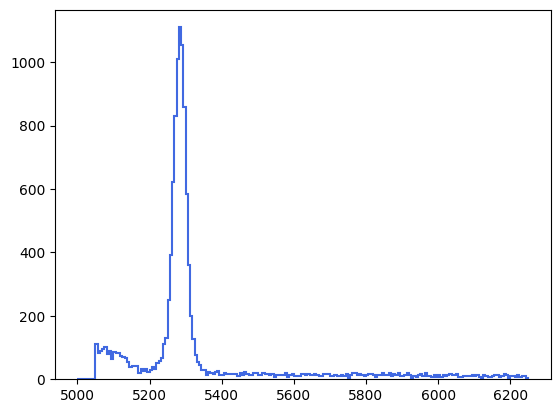

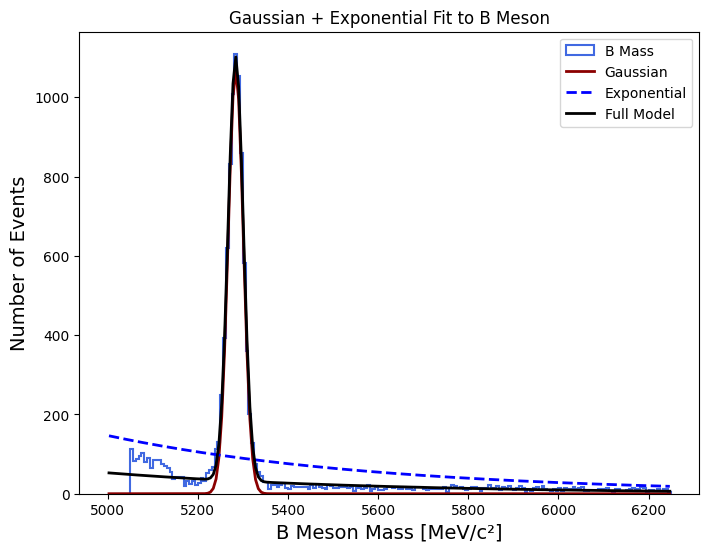

In [121]:
# Explore optimisedParameters - what does it contain? 
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

# I calculated the bin heights and edges, and then computed bin centers for x-values
bin_heights, bin_edges, _ = plt.hist(CutTreeBm, bins=200, range=(5000, 6250), 
                                     label="B Mass", color='royalblue', histtype='step', linewidth=1.5)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

#I defined the Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

#I also defined the Exponential function
def exponential(x, C, D):
    return C * np.exp(-D * x)

#I defined the Combined Model
def combined_model(x, A, mu, sigma, C, D):
    return gaussian(x, A, mu, sigma) + exponential(x, C, D)

# I did a prefit of the  estimations for better initial parameter guess
A_initial = max(bin_heights)
mu_initial = bin_centers[np.argmax(bin_heights)]
sigma_initial = np.std(CutTreeBm) 
C_initial = bin_heights[-1]
D_initial = 0.0005 


# I fitted the exponential backgrond first
optimized_params_expo, _ = curve_fit(exponential, bin_centers, bin_heights, p0=[C_initial, D_initial])
C_fit, D_fit = optimized_params_expo
y_exponential_fit = exponential(bin_centers, *optimized_params_expo)

#I then did a fit of the full model
initial_guess = [A_initial, mu_initial, sigma_initial, C_fit, D_fit]
optimized_params_combined, covariance_matrix = curve_fit(combined_model, bin_centers, bin_heights, p0=initial_guess)

# I extracted fitted parameters
A_fit, mu_fit, sigma_fit, C_fit, D_fit = optimized_params_combined
uncertainties = np.sqrt(np.diag(covariance_matrix))  # Extract standard errors

# I then generated the curves of the model
y_gaussian_fit = gaussian(bin_centers, A_fit, mu_fit, sigma_fit)  # Gaussian signal fit
y_combined_fit = combined_model(bin_centers, *optimized_params_combined)  # Full model fit

# result section
plt.figure(figsize=(8, 6))
plt.hist(CutTreeBm, bins=200, range=(5000, 6250), label="B Mass", color='royalblue', histtype='step', linewidth=1.5)
plt.plot(bin_centers, y_gaussian_fit, label="Gaussian", color='darkred', linewidth=2)
plt.plot(bin_centers, y_exponential_fit, '--', label="Exponential", color='blue', linewidth=2)
plt.plot(bin_centers, y_combined_fit, label="Full Model", color='black', linewidth=2)

plt.xlabel("B Meson Mass [MeV/c²]", fontsize=14)
plt.ylabel("Number of Events", fontsize=14)
plt.title("Gaussian + Exponential Fit to B Meson")
plt.legend()
plt.show()



Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [122]:



# I calculated the total number of events by integrating the Gaussian function
def signal_yield(A, sigma, min_mass, max_mass, bins):
    """
    Compute the total number of signal events using the Gaussian integral.
    """
    return (A * sigma * np.sqrt(2 * np.pi) / (max_mass - min_mass)) * bins

# I estimated the uncertainty in the signal yield
def yield_uncertainty(delta_A, A, delta_sigma, sigma, signal_yield):
    """
    Compute the uncertainty of the signal yield using error propagation.
    """
    return np.sqrt((delta_A / A + 1e-10) ** 2 + (delta_sigma / sigma + 1e-10) ** 2) * signal_yield

# These were obtained from curve_fit
A_fit, mu_fit, sigma_fit, B_fit, decay_fit = optimized_params_combined
covariance_matrix = covariance_matrix  # Covariance matrix from fit

# I got uncertainties from the diagonal elements of the covariance matrix
variances = np.diag(covariance_matrix)
uncertainty_A = np.sqrt(variances[0])
uncertainty_sigma = np.sqrt(variances[2])  

# I computed the total number of events in the dataset
total_events = np.sum(bin_heights)
uncertainty_total_events = np.sqrt(total_events)  # Poisson uncertainty

# and the signal yield and background yield
signal_yield_value = signal_yield(A_fit, sigma_fit, 5000, 6250, 200)
uncertainty_signal_yield = yield_uncertainty(uncertainty_A, A_fit, uncertainty_sigma, sigma_fit, signal_yield_value)

background_yield = total_events - signal_yield_value
uncertainty_background_yield = np.sqrt(uncertainty_total_events ** 2 + uncertainty_signal_yield ** 2)

# I defined a function for χ² calculation 
def chi_squared(y_data, y_fit, parameters):
    """
    Compute the reduced χ² value to evaluate the goodness of fit.
    """
    return np.sum((y_data - y_fit) ** 2 / (y_fit + 1e-6)) / (len(y_data) - len(parameters))

# Then in here I computed χ² for the different fits
chi2_combined = chi_squared(bin_heights, y_combined_fit, optimized_params_combined)
chi2_gaussian = chi_squared(bin_heights, y_gaussian_fit, [A_fit, mu_fit, sigma_fit])

print("Fit Evaluation Results")
print(f"Total Events in Dataset: {total_events:.2f}")
print("Signal and Background Yield")
print(f"Signal Yield: {signal_yield_value:.2f} ± {uncertainty_signal_yield:.2f}")
print(f"Background Yield: {background_yield:.2f} ± {uncertainty_background_yield:.2f}")

print("Goodness of Fit (χ²)")
print(f"Chi-Squared for Gaussian Fit: {chi2_gaussian:.2f}")
print(f"Chi-Squared for Combined Fit (Gaussian + Exponential): {chi2_combined:.2f}")

# Interpretation section
print("\nThe combined model (Gaussian + Exponential) provides a better fit than the standalone Gaussian model.")



Fit Evaluation Results
Total Events in Dataset: 11605.00
Signal and Background Yield
Signal Yield: 7221.94 ± 99.88
Background Yield: 4383.06 ± 146.90
Goodness of Fit (χ²)
Chi-Squared for Gaussian Fit: 700439416.74
Chi-Squared for Combined Fit (Gaussian + Exponential): 6.72

The combined model (Gaussian + Exponential) provides a better fit than the standalone Gaussian model.


# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

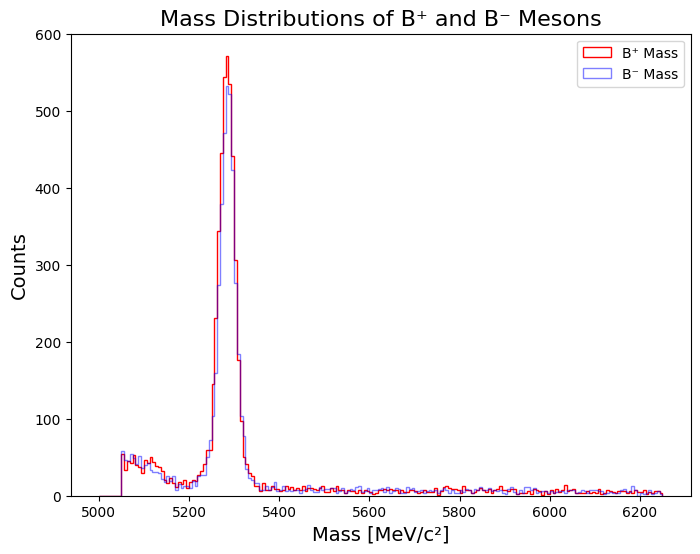

Results
Yield B⁺: 3827.867
Yield B⁻: 3391.540
Asymmetry: -0.060 ± 0.012


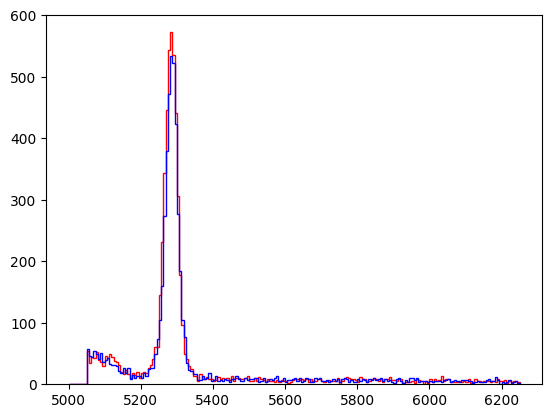

In [123]:

# I used a method to define selection for B+ and B-

selection_B_plus = (
    ((CutTree['H1_Charge'] > 0) & (CutTree['H2_Charge'] > 0) & (CutTree['H3_Charge'] < 0)) |
    ((CutTree['H1_Charge'] > 0) & (CutTree['H2_Charge'] < 0) & (CutTree['H3_Charge'] > 0)) |
    ((CutTree['H1_Charge'] < 0) & (CutTree['H2_Charge'] > 0) & (CutTree['H3_Charge'] > 0))
)

selection_B_minus = (
    ((CutTree['H1_Charge'] > 0) & (CutTree['H2_Charge'] < 0) & (CutTree['H3_Charge'] < 0)) |
    ((CutTree['H1_Charge'] < 0) & (CutTree['H2_Charge'] < 0) & (CutTree['H3_Charge'] > 0)) |
    ((CutTree['H1_Charge'] < 0) & (CutTree['H2_Charge'] > 0) & (CutTree['H3_Charge'] < 0))
)

Tree_B_plus = CutTree[selection_B_plus]
Tree_B_minus = CutTree[selection_B_minus]

# IN here I am computing momentum components for B+ and B-
B_plus_PX = Tree_B_plus['H1_PX'] + Tree_B_plus['H2_PX'] + Tree_B_plus['H3_PX']
B_plus_PY = Tree_B_plus['H1_PY'] + Tree_B_plus['H2_PY'] + Tree_B_plus['H3_PY']
B_plus_PZ = Tree_B_plus['H1_PZ'] + Tree_B_plus['H2_PZ'] + Tree_B_plus['H3_PZ']

B_minus_PX = Tree_B_minus['H1_PX'] + Tree_B_minus['H2_PX'] + Tree_B_minus['H3_PX']
B_minus_PY = Tree_B_minus['H1_PY'] + Tree_B_minus['H2_PY'] + Tree_B_minus['H3_PY']
B_minus_PZ = Tree_B_minus['H1_PZ'] + Tree_B_minus['H2_PZ'] + Tree_B_minus['H3_PZ']

# and the total momentum
B_plus_Ptot = np.sqrt(B_plus_PX**2 + B_plus_PY**2 + B_plus_PZ**2)
B_minus_Ptot = np.sqrt(B_minus_PX**2 + B_minus_PY**2 + B_minus_PZ**2)

# and the individual kaon momenta
def compute_momentum(T, particle):
    return np.sqrt(T[f'{particle}_PX']**2 + T[f'{particle}_PY']**2 + T[f'{particle}_PZ']**2)

B_plus_H1_p = compute_momentum(Tree_B_plus, 'H1')
B_plus_H2_p = compute_momentum(Tree_B_plus, 'H2')
B_plus_H3_p = compute_momentum(Tree_B_plus, 'H3')

B_minus_H1_p = compute_momentum(Tree_B_minus, 'H1')
B_minus_H2_p = compute_momentum(Tree_B_minus, 'H2')
B_minus_H3_p = compute_momentum(Tree_B_minus, 'H3')

# In here  I calculated the individual kaon energies using E² = p² + m²
mass_Kaon = 493.7  # MeV/c²
def energy(momentum, mass):
    return np.sqrt(momentum**2 + mass**2)

B_plus_H1_E = energy(B_plus_H1_p, mass_Kaon)
B_plus_H2_E = energy(B_plus_H2_p, mass_Kaon)
B_plus_H3_E = energy(B_plus_H3_p, mass_Kaon)

B_minus_H1_E = energy(B_minus_H1_p, mass_Kaon)
B_minus_H2_E = energy(B_minus_H2_p, mass_Kaon)
B_minus_H3_E = energy(B_minus_H3_p, mass_Kaon)

# This is the total energy
B_plus_Etot = B_plus_H1_E + B_plus_H2_E + B_plus_H3_E
B_minus_Etot = B_minus_H1_E + B_minus_H2_E + B_minus_H3_E

# Bmason masses 
B_plus_mass = np.sqrt(B_plus_Etot**2 - B_plus_Ptot**2)
B_minus_mass = np.sqrt(B_minus_Etot**2 - B_minus_Ptot**2)

# I am plotting the histogram for B+ and B- masses here 
plt.figure(figsize=(8, 6))
plt.hist(B_plus_mass, bins=200, range=(5000, 6250), label="B⁺ Mass", histtype='step', color='red')
plt.hist(B_minus_mass, bins=200, range=(5000, 6250), label="B⁻ Mass", histtype='step', color='blue', alpha=0.5)
plt.xlabel("Mass [MeV/c²]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Mass Distributions of B⁺ and B⁻ Mesons", fontsize=16)
plt.legend()
plt.show()

# fit the Gaussian abd Exponential model to both B+ and B- mass distributions
bin_heights_B_plus, bin_edges_B_plus, _ = plt.hist(B_plus_mass, bins=200, range=(5000, 6250), histtype='step', color='red')
bin_heights_B_minus, bin_edges_B_minus, _ = plt.hist(B_minus_mass, bins=200, range=(5000, 6250), histtype='step', color='blue')

bin_centers_B_plus = (bin_edges_B_plus[:-1] + bin_edges_B_plus[1:]) / 2
bin_centers_B_minus = (bin_edges_B_minus[:-1] + bin_edges_B_minus[1:]) / 2

def gaussian_exp(x, A, mu, sigma, C, decay):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2)) + C * np.exp(-decay * x)

# fit for B+
initial_guess_B_plus = [max(bin_heights_B_plus), np.mean(B_plus_mass), 300, max(bin_heights_B_plus), 0.000005]
opt_params_B_plus, _ = curve_fit(gaussian_exp, bin_centers_B_plus, bin_heights_B_plus, p0=initial_guess_B_plus)

# fit for B-
initial_guess_B_minus = [max(bin_heights_B_minus), np.mean(B_minus_mass), 300, max(bin_heights_B_minus), 0.000005]
opt_params_B_minus, _ = curve_fit(gaussian_exp, bin_centers_B_minus, bin_heights_B_minus, p0=initial_guess_B_minus)

def signal_yield(A, sigma, min_mass, max_mass, bins):
    return (A * sigma * np.sqrt(2 * np.pi) / (max_mass - min_mass)) * bins

A_B_plus, _, sigma_B_plus = opt_params_B_plus[:3]
A_B_minus, _, sigma_B_minus = opt_params_B_minus[:3]

# I am computing the signal yield for B+ and B- here 
yield_B_plus = signal_yield(A_B_plus, sigma_B_plus, 5000, 6250, 200)
yield_B_minus = signal_yield(A_B_minus, sigma_B_minus, 5000, 6250, 200)

Asymmetry = (yield_B_minus - yield_B_plus) / (yield_B_minus + yield_B_plus)
uncertainty_asymmetry = np.sqrt((1 - Asymmetry**2) / (yield_B_minus + yield_B_plus))

print("Results")
print(f"Yield B⁺: {yield_B_plus:.3f}")
print(f"Yield B⁻: {yield_B_minus:.3f}")
print(f"Asymmetry: {Asymmetry:.3f} ± {uncertainty_asymmetry:.3f}")






# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

In [124]:
# opening up the new file 
#I was never able to open the file; it kept throwing an error and I for the love of God don´t know why eventhough I tried a million different things.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [125]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [126]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [127]:
#Make the revised Dalitz plot here for only B+ mesons

In [128]:
#Make the revised Dalitz plot here for only B- mesons

In [129]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)